In [26]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import json
import matplotlib.pyplot as plt
import plotly.express as px
import imageio
import warnings
warnings.filterwarnings('ignore')

In [27]:
#Read in the data from the raw Zillow CSV for ZALL
zillow_path = Path("../data/clean_data/zall_metro.csv")
zillow_df = pd.read_csv(zillow_path, infer_datetime_format=True, parse_dates=True)

zillow_df["date"] = pd.to_datetime(zillow_df["date"])
zillow_df["region"] = zillow_df["region"].str.replace(", TX", "", regex=False)
zillow_year_df = zillow_df.groupby(["region",zillow_df["date"].dt.year]).mean()
zillow_year_df = zillow_year_df.reset_index()
zillow_year_df = zillow_year_df.rename(columns={"date":"YEAR"})
zillow_year_df.head()

,region,YEAR,avg_value
0,Austin,1996,165680.250000
1,Austin,1997,168675.916667
2,Austin,1998,172097.333333
3,Austin,1999,173058.083333
4,Austin,2000,187038.750000


In [70]:
zcon_path = Path("../data/clean_data/zcon_metro.csv")
zcon_df = pd.read_csv(zcon_path, infer_datetime_format=True, parse_dates=True)

zcon_df["date"] = pd.to_datetime(zcon_df["date"])
zcon_df["region"] = zcon_df["region"].str.replace(", TX", "", regex=False)
zcon_year_df = zcon_df.groupby(["region",zcon_df["date"].dt.year]).mean()
zcon_year_df = zcon_year_df.reset_index()
zcon_year_df = zcon_year_df.rename(columns={"date":"YEAR"})
zcon_year_df.head()

,region,YEAR,avg_value
0,Austin,1996,150266.083333
1,Austin,1997,154770.250000
2,Austin,1998,168308.000000
3,Austin,1999,174688.166667
4,Austin,2000,185008.916667


In [71]:
zrent_path = Path("../data/clean_data/rsna_metro.csv")
zrent_df = pd.read_csv(zrent_path, infer_datetime_format=True, parse_dates=True)

zrent_df["date"] = pd.to_datetime(zrent_df["date"])
zrent_df["region"] = zrent_df["region"].str.replace(", TX", "", regex=False)
zrent_year_df = zrent_df.groupby(["region",zrent_df["date"].dt.year]).mean()
zrent_year_df = zrent_year_df.reset_index()
zrent_year_df = zrent_year_df.rename(columns={"date":"YEAR"})
zrent_year_df.head()

,region,YEAR,avg_value
0,Austin,2014,1352.583333
1,Austin,2015,1433.333333
2,Austin,2016,1484.500000
3,Austin,2017,1503.416667
4,Austin,2018,1539.000000


In [72]:
#Read in the salary data from the IRS csv
salary_df = pd.read_csv("../data/clean_data/cnc_sal_data.csv")
salary_df.head()

,YEAR,ZIP CODE,NO. OF RETURNS,AGI
0,2007,73301,1798,7230
1,2007,73949,43,1915
2,2007,75001,7128,693056
3,2007,75002,26669,2002247
4,2007,75006,21953,1053748


In [73]:
zip_metro_df = pd.read_csv("../data/clean_data/zipcode_metro.csv")
zip_metro_df = zip_metro_df.rename(columns={"ZIPCODE" : "ZIP CODE", "ZONE":"region"})
zip_metro_df.head()

,ZIP CODE,region
0,77002,Houston
1,77003,Houston
2,77004,Houston
3,77005,Houston
4,77006,Houston


In [74]:
#Merge the salary data with the zip_metro data
salary_metro_df = pd.merge(zip_metro_df, salary_df, on=['ZIP CODE']).dropna()
salary_metro_df.head()

,ZIP CODE,region,YEAR,NO. OF RETURNS,AGI
0,77002,Houston,2007,3370,819744
1,77002,Houston,2008,3599,1259964
2,77002,Houston,2009,3816,978793
3,77002,Houston,2010,3952,1996053
4,77002,Houston,2011,4562,1595344


In [75]:
#Group by region
salary_metro_df = salary_metro_df.groupby(["region","YEAR"]).sum()
salary_metro_df["Avg_AGI"] = salary_metro_df["AGI"] / salary_metro_df["NO. OF RETURNS"] * 1000
salary_metro_df = salary_metro_df.reset_index()
salary_metro_df.head()

,region,YEAR,ZIP CODE,NO. OF RETURNS,AGI,Avg_AGI
0,Austin,2007,3306167,472473,32099099,67938.483257
1,Austin,2008,3306167,465682,30769974,66075.076984
2,Austin,2009,3306167,479563,30456486,63508.831999
3,Austin,2010,3306167,495992,33362017,67263.215939
4,Austin,2011,3306167,516754,36237502,70125.247216


In [76]:
#Merge the Zillow data with the salary data
zall_combined_df = pd.merge(salary_metro_df, zillow_year_df, on=['region','YEAR'])
zall_combined_df["OP_RATIO"] = zall_combined_df['Avg_AGI'] / zall_combined_df["avg_value"]
zall_combined_df = zall_combined_df.drop(columns=["AGI","NO. OF RETURNS","Avg_AGI","avg_value","ZIP CODE"])

zcon_combined_df = pd.merge(salary_metro_df, zcon_year_df, on=['region','YEAR'])
zcon_combined_df["OP_RATIO"] = zcon_combined_df['Avg_AGI'] / zcon_combined_df["avg_value"]
zcon_combined_df = zcon_combined_df.drop(columns=["AGI","NO. OF RETURNS","Avg_AGI","avg_value","ZIP CODE"])

zrent_combined_df = pd.merge(salary_metro_df, zrent_year_df, on=['region','YEAR'])
zrent_combined_df["OP_RATIO"] = zrent_combined_df['Avg_AGI'] / zrent_combined_df["avg_value"]
zrent_combined_df = zrent_combined_df.drop(columns=["AGI","NO. OF RETURNS","Avg_AGI","avg_value","ZIP CODE"])

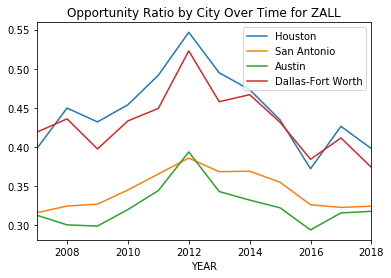

In [77]:
ax = zall_combined_df[zall_combined_df["region"]=="Houston"].plot(x="YEAR",y="OP_RATIO", title="Opportunity Ratio by City Over Time for ZALL")
zall_combined_df[zall_combined_df["region"]=="San Antonio"].plot(x="YEAR",y="OP_RATIO", ax=ax)
zall_combined_df[zall_combined_df["region"]=="Austin"].plot(x="YEAR",y="OP_RATIO", ax=ax)
zall_combined_df[zall_combined_df["region"]=="Dallas-Fort Worth"].plot(x="YEAR",y="OP_RATIO", ax=ax)
ax.legend(["Houston", "San Antonio", "Austin", "Dallas-Fort Worth"])

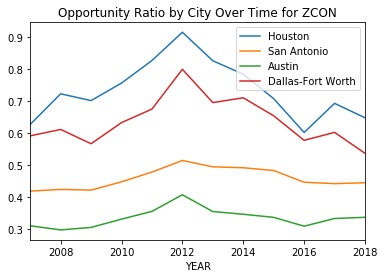

In [78]:
ax = zcon_combined_df[zcon_combined_df["region"]=="Houston"].plot(x="YEAR",y="OP_RATIO", title="Opportunity Ratio by City Over Time for ZCON")
zcon_combined_df[zcon_combined_df["region"]=="San Antonio"].plot(x="YEAR",y="OP_RATIO", ax=ax)
zcon_combined_df[zcon_combined_df["region"]=="Austin"].plot(x="YEAR",y="OP_RATIO", ax=ax)
zcon_combined_df[zcon_combined_df["region"]=="Dallas-Fort Worth"].plot(x="YEAR",y="OP_RATIO", ax=ax)
ax.legend(["Houston", "San Antonio", "Austin", "Dallas-Fort Worth"])

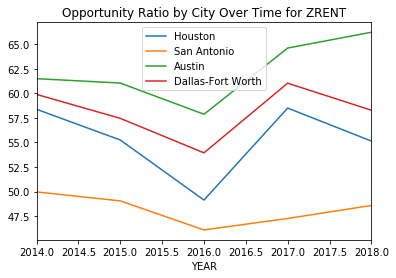

In [81]:
ax = zrent_combined_df[zrent_combined_df["region"]=="Houston"].plot(x="YEAR",y="OP_RATIO", title="Opportunity Ratio by City Over Time for ZRENT")
zrent_combined_df[zrent_combined_df["region"]=="San Antonio"].plot(x="YEAR",y="OP_RATIO", ax=ax)
zrent_combined_df[zrent_combined_df["region"]=="Austin"].plot(x="YEAR",y="OP_RATIO", ax=ax)
zrent_combined_df[zrent_combined_df["region"]=="Dallas-Fort Worth"].plot(x="YEAR",y="OP_RATIO", ax=ax)
ax.legend(["Houston", "San Antonio", "Austin", "Dallas-Fort Worth"])